<h1>NBA Shooting Analysis</h1>

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
from sklearn import linear_model
import requests
from nba_api.stats import endpoints
from matplotlib import pyplot as plt

from nba_api.stats.static import teams,players
teams=teams.get_teams()
nba_players = players.get_players()

from nba_api.stats.library.parameters import SeasonAll
import matplotlib as mpl
import json
import requests

In [2]:
pd.DataFrame(teams)

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Atlanta,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966
5,1610612742,Dallas Mavericks,DAL,Mavericks,Dallas,Texas,1980
6,1610612743,Denver Nuggets,DEN,Nuggets,Denver,Colorado,1976
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946
8,1610612745,Houston Rockets,HOU,Rockets,Houston,Texas,1967
9,1610612746,Los Angeles Clippers,LAC,Clippers,Los Angeles,California,1970


<h1>Analysing Relationship between PPG and FG% of players for shooting analysis</h1>

In [3]:
#Getting the league leaders of current season
data = endpoints.leagueleaders.LeagueLeaders() 
df = data.league_leaders.get_data_frame()

df

,PLAYER_ID,RANK,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
0,201935,1,James Harden,HOU,68,2483,672,1514,0.444,299,...,446,512,125,60,308,227,2335,2220,1.66,0.41
1,203081,2,Damian Lillard,POR,66,2474,624,1349,0.463,270,...,284,530,70,22,194,114,1978,1907,2.73,0.36
2,1626164,3,Devin Booker,PHX,70,2512,627,1283,0.489,141,...,297,456,49,18,264,213,1863,1722,1.73,0.19
3,203507,4,Giannis Antetokounmpo,MIL,63,1917,685,1238,0.553,89,...,856,354,61,66,230,195,1857,2180,1.54,0.27
4,1629027,5,Trae Young,ATL,60,2120,546,1249,0.437,205,...,255,560,65,8,289,104,1778,1596,1.94,0.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,1629676,525,Isaiah Roby,OKC,3,11,0,1,0.000,0,...,2,0,0,0,1,1,0,0,0.00,0.00
525,1629122,525,J.P. Macura,CLE,1,1,0,0,0.000,0,...,0,0,0,0,0,0,0,0,0.00,0.00
526,1629716,525,Marques Bolden,CLE,1,3,0,0,0.000,0,...,2,0,1,0,0,1,0,3,0.00,0.00
527,1629742,525,Stanton Kidd,UTA,4,15,0,3,0.000,0,...,3,1,0,0,2,3,0,-1,0.50,0.00


In [4]:
#Getting PPG(Points per game) and FGA (Field Goal Attempts)
x, y = df.FGA/df.GP, df.PTS/df.GP 

x = np.array(x).reshape(-1,1) 
y = np.array(y).reshape(-1,1) 

In [5]:
#Using data in Linear Regression Model
model = linear_model.LinearRegression()   
model.fit(x,y)                          

r2 = round(model.score(x,y), 2)           
predicted_y = model.predict(x)

Text([12.32857143], [25.61428571], 'Devin Booker')

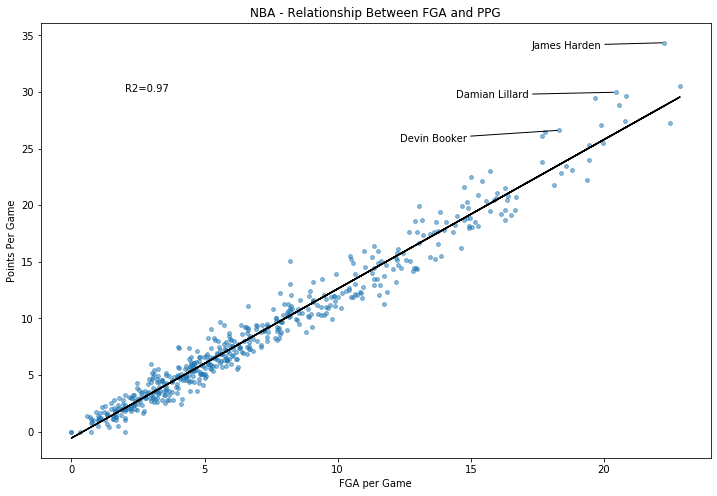

In [6]:
#Plotting PPG Vs FGA 
#Also marking top 3 players with highest number of points
plt.figure(figsize=(12,8))
plt.scatter(x, y, s=15, alpha=.5)                           
plt.plot(x, predicted_y, color = 'black')                   
plt.title('NBA - Relationship Between FGA and PPG')         
plt.xlabel('FGA per Game')                                  
plt.ylabel('Points Per Game')                                
plt.text(2,30, f'R2={r2}')                                  


plt.annotate(df.PLAYER[0],                       
             (x[0], y[0]),                         
             (x[0]-5,y[0]-0.5),                    
             arrowprops=dict(arrowstyle='-'))

plt.annotate(df.PLAYER[1],                       
             (x[1], y[1]),                         
             (x[1]-6,y[1]-0.5),                    
             arrowprops=dict(arrowstyle='-'))

plt.annotate(df.PLAYER[2],                       
             (x[2], y[2]),                         
             (x[2]-6,y[2]-1),                    
             arrowprops=dict(arrowstyle='-'))

We can see that,Elite Players with High efficiency are allowed to take more shooting attempts and hence result to higher points scored per game.

<h1>Making a Shot Chart for individual shooting analysis</h1>

In [7]:
#Getting Team ID
team_id= [team_id for team_id in teams
         if team_id['full_name'] == 'Golden State Warriors'][0]['id']
team_id

1610612744

In [8]:
#Getting Player ID
player_id= [player_id for player_id in nba_players
         if player_id['full_name'] == 'Stephen Curry'][0]['id']
player_id

201939

In [9]:
from nba_api.stats.endpoints import shotchartdetail

# Create JSON request for Stephen Curry *My favourite Player* shot Chart Details
shot_json = shotchartdetail.ShotChartDetail(
            team_id=1610612744,
            player_id = 201939,
            context_measure_simple = 'PTS',
            season_nullable = '2018-19',
            season_type_all_star = 'Regular Season')

In [10]:
shot_data = json.loads(shot_json.get_json())

# Get the relevant data from our dictionary
relevant_data = shot_data['resultSets'][0]

# Get the headers and row data
headers = relevant_data['headers']
rows = relevant_data['rowSet']

In [11]:
# Create pandas DataFrame
player_data = pd.DataFrame(rows)
player_data.columns = headers
headers

['GRID_TYPE',
 'GAME_ID',
 'GAME_EVENT_ID',
 'PLAYER_ID',
 'PLAYER_NAME',
 'TEAM_ID',
 'TEAM_NAME',
 'PERIOD',
 'MINUTES_REMAINING',
 'SECONDS_REMAINING',
 'EVENT_TYPE',
 'ACTION_TYPE',
 'SHOT_TYPE',
 'SHOT_ZONE_BASIC',
 'SHOT_ZONE_AREA',
 'SHOT_ZONE_RANGE',
 'SHOT_DISTANCE',
 'LOC_X',
 'LOC_Y',
 'SHOT_ATTEMPTED_FLAG',
 'SHOT_MADE_FLAG',
 'GAME_DATE',
 'HTM',
 'VTM']

In [12]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

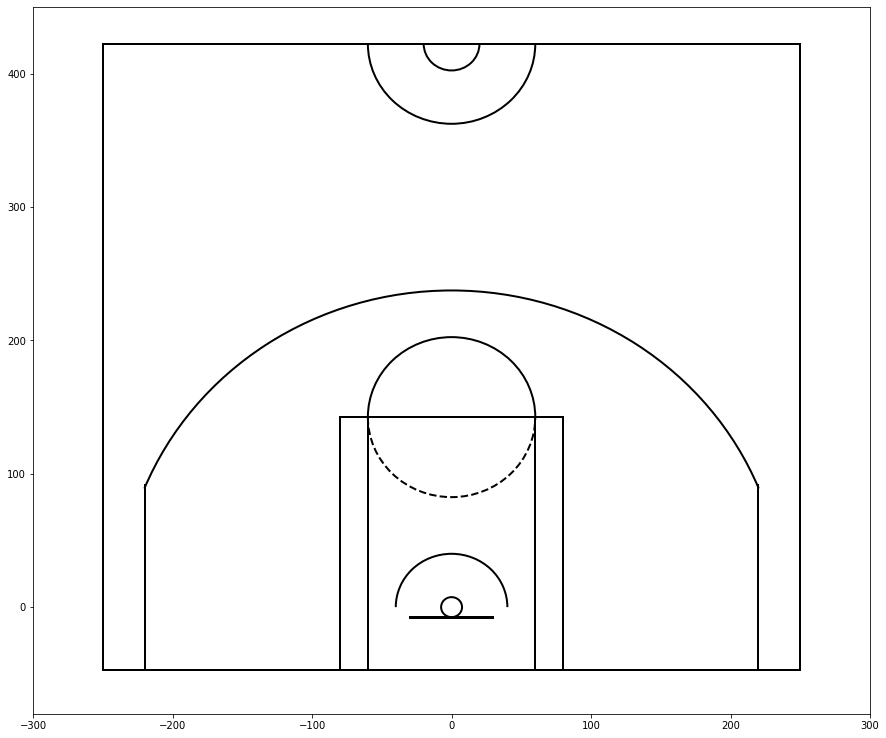

In [13]:
plt.figure(figsize=(15,13))
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-80,450)
plt.show()

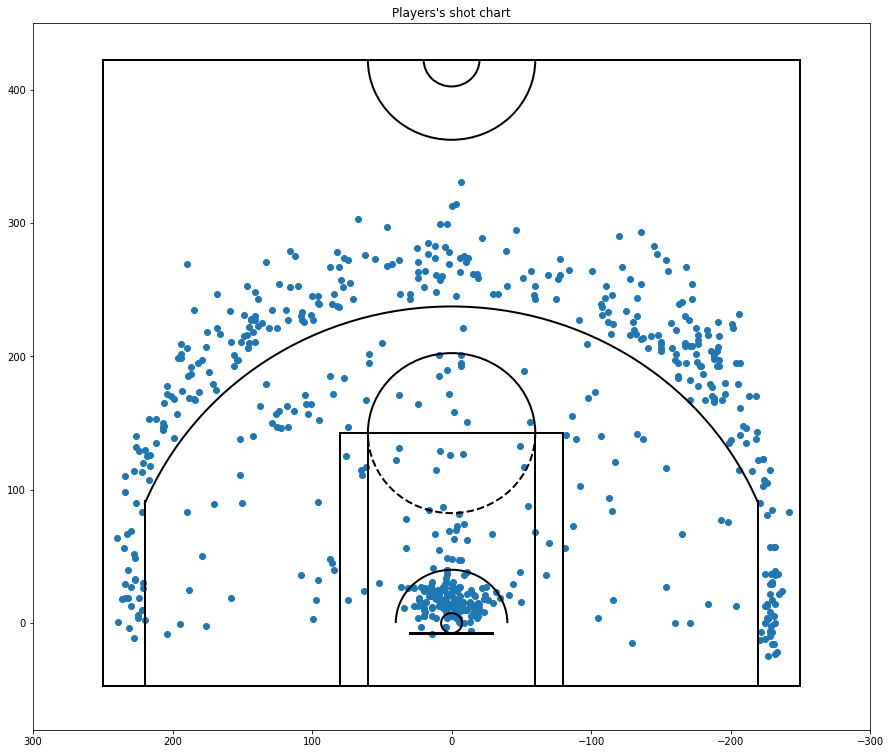

In [14]:
plt.figure(figsize=(15,13))
plt.scatter(player_data.LOC_X, player_data.LOC_Y)
draw_court(outer_lines=True)

# Descending values along the axis from left to right
plt.xlim(300,-300)
plt.ylim(-80,450)
plt.title("Players's shot chart")
plt.show()